In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("data/titanic_toy.csv",usecols=['Age','Fare','Survived'])

In [5]:
df.head(5)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [6]:
df.isnull().value_counts()

Age    Fare   Survived
False  False  False       675
True   False  False       171
False  True   False        39
True   True   False         6
Name: count, dtype: int64

In [10]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [12]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [15]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [16]:
x_test.tail(4)

,Age,Fare,Age_imputed
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,NaN,29.0


In [22]:
x_train.loc[x_train['Age_imputed'].isnull(), 'Age_imputed'] = x_train['Age'].dropna().sample(x_train['Age_imputed'].isnull().sum()).values
x_test.loc[x_test['Age_imputed'].isnull(), 'Age_imputed'] = x_test['Age'].dropna().sample(x_test['Age_imputed'].isnull().sum()).values


In [23]:
x_train.head(5)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [24]:
x_train['Age'].isnull().sum()

148

In [25]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([16.  , 60.  , 30.  , 26.  , 33.  ,  9.  , 29.  , 40.  , 38.  ,
       22.  , 29.  , 22.  , 20.  ,  6.  , 19.  , 18.  , 16.  , 50.  ,
       31.  , 34.5 , 19.  , 27.  , 23.  , 61.  , 19.  , 41.  ,  3.  ,
       36.  , 24.  , 25.  , 11.  , 28.  , 36.  , 22.  , 14.  , 42.  ,
       18.  , 39.  , 30.  , 34.  , 19.  ,  8.  , 40.  ,  1.  , 43.  ,
       20.  , 23.  , 24.  , 45.  ,  5.  ,  7.  ,  2.  , 22.  , 23.  ,
       59.  , 51.  , 39.  , 27.  , 21.  , 56.  , 20.  , 30.  , 39.  ,
       28.  , 49.  , 57.  , 18.  , 21.  , 38.  , 20.  , 53.  , 43.  ,
       28.  , 32.  , 47.  , 29.  , 30.  , 30.  , 58.  , 40.  , 18.  ,
       36.  , 52.  , 40.5 , 51.  , 26.  , 21.  , 49.  , 44.  , 32.  ,
       32.  , 25.  , 28.  , 21.  , 45.  , 45.  , 70.5 , 28.  , 58.  ,
       49.  , 29.  , 27.  ,  9.  , 35.  , 13.  , 31.  , 56.  , 22.  ,
       34.  , 50.  , 21.  , 18.  , 61.  , 34.  , 27.  ,  0.83, 39.  ,
       29.  , 29.  , 17.  ,  6.  , 14.  , 43.  , 36.  , 15.  , 26.  ,
       44.  , 54.  ,

In [26]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,70.5
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


C:\Users\aryal\AppData\Local\Temp\ipykernel_2420\1098431515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\aryal\AppData\Local\Temp\ipykernel_2420\1098431515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['A

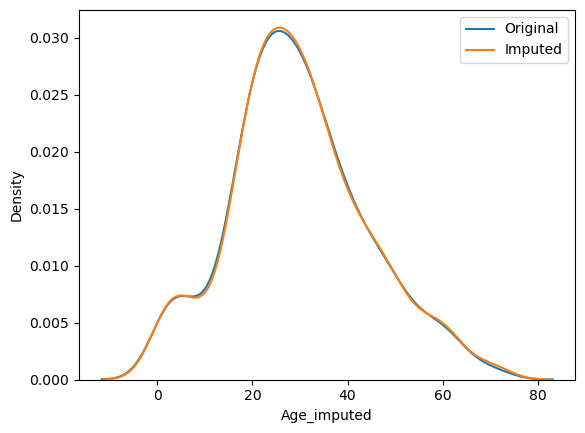

In [28]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)
plt.legend()
plt.show()

In [30]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  208.0165901507607


In [32]:
dff=pd.read_csv("data/house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [33]:
dff.sample(5)

,FireplaceQu,GarageQual,SalePrice
13,Gd,TA,279500
445,Gd,TA,127500
1033,NaN,TA,230000
108,NaN,NaN,115000
655,NaN,TA,88000


In [36]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [37]:
X=dff
Y=dff['SalePrice']

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
X_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


In [40]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']
X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [41]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
763,Gd,TA,337000,TA,Gd
887,NaN,TA,135500,TA,NaN
746,TA,TA,236000,TA,TA
1108,TA,TA,181000,TA,TA
122,NaN,TA,136000,TA,NaN


In [43]:
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum()).values
X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_test['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values
X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum()).values
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values


In [44]:
temp = pd.concat(
[
X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
X_train['GarageQual_imputed'].value_counts() / len(X_train)
],
axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.953767
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [45]:
temp = pd.concat(
[
X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
X_train['FireplaceQu_imputed'].value_counts() / len(df)
],
axis=1)
temp.columns = ['original', 'imputed']
temp


,original,imputed
Gd,0.494272,0.653199
TA,0.412439,0.538721
Fa,0.040917,0.053872
Po,0.027823,0.035915
Ex,0.024550,0.029181


C:\Users\aryal\AppData\Local\Temp\ipykernel_2420\4070077928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for category in X_train['FireplaceQu'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\aryal\AppData\Local\Temp\ipykernel_2420\4070077928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, plea

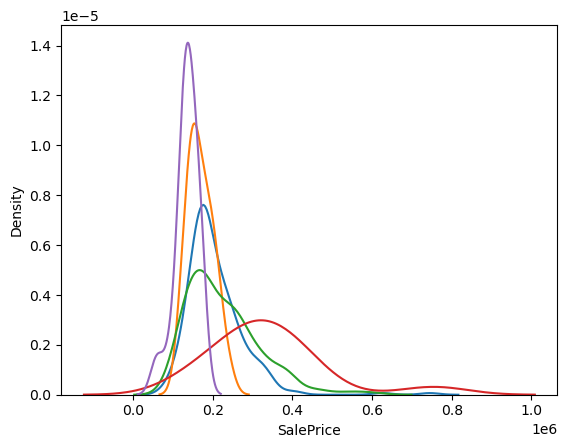

In [46]:
for category in X_train['FireplaceQu'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\aryal\AppData\Local\Temp\ipykernel_2420\1231138130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for category in X_train['FireplaceQu_imputed'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\aryal\AppData\Local\Temp\ipykernel_2420\1231138130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new

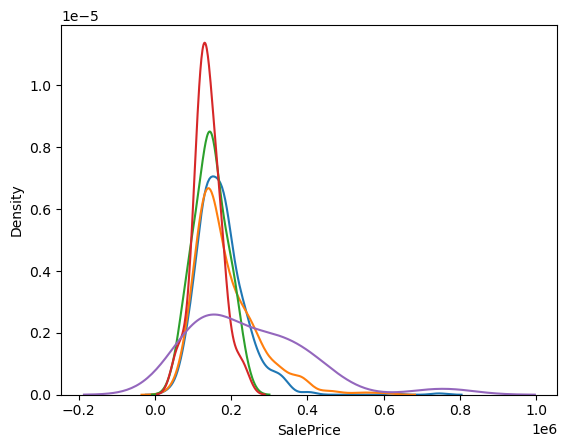

In [47]:
for category in X_train['FireplaceQu_imputed'].dropna().unique(): sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()